# **Importação dos Frameworks**

In [96]:
# Modelagem de dados 
import pandas as pd 
import numpy as np

# Gráficos 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Avisos 
import warnings 
warnings.filterwarnings('ignore')

# Configurações 
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

plt.rcParams['figure.figsize'] = (12,6)
plt.style.use('seaborn-darkgrid')

# Libs
import re #REGEX
import nltk #NLP

# **Importação dos Dados** 

In [ ]:
# Lendo os dados 
Base_Dados = pd.read_csv('Tweets_Mg.csv')

# Dimensão 
Base_Dados.shape

(8199, 26)

In [ ]:
# Verificando 
Base_Dados.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Observação,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Modelagem dos Dados e EDA ( Análise Exploratória de Dados)**



## **Campos Nulos**

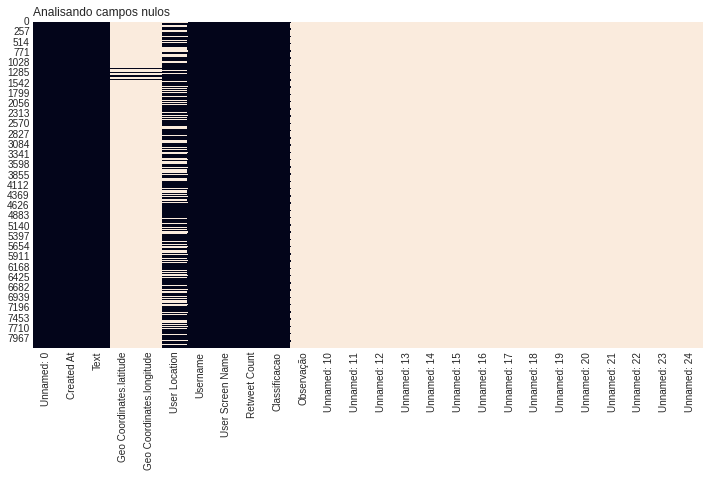

In [ ]:
# Avaliando campos nulos 
Nulos = Base_Dados.isnull()

plt.title('Analisando campos nulos', loc='left')
sns.heatmap( Nulos, cbar=False);

In [ ]:
# Colunas 
Base_Dados.columns

Index(['Unnamed: 0', 'Created At', 'Text', 'Geo Coordinates.latitude',
       'Geo Coordinates.longitude', 'User Location', 'Username',
       'User Screen Name', 'Retweet Count', 'Classificacao', 'Observação',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [ ]:
# Remover colunas apenas com conteúdo nulo
Colunas_Extrair=Base_Dados.columns[10:]
Base_Dados.drop( columns=Colunas_Extrair, inplace=True ) 

In [ ]:
Base_Dados.shape

(8199, 10)

In [ ]:
# Campos únicos 
Base_Dados.nunique()

Unnamed: 0                   8199
Created At                   7945
Text                         5765
Geo Coordinates.latitude       57
Geo Coordinates.longitude      57
User Location                1591
Username                     3907
User Screen Name             3966
Retweet Count                 113
Classificacao                   3
dtype: int64

In [ ]:
# Retirar campos sem dados relevantes 
Base_Dados.drop( columns='Unnamed: 0', inplace=True )

# Dimensão da Base de Dados 
Base_Dados.shape

(8199, 9)

In [ ]:
# Verificando 
Base_Dados.head()

,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao
0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro
1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro
2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro
3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro
4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo


In [ ]:
# Info 
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Created At                 8199 non-null   object 
 1   Text                       8199 non-null   object 
 2   Geo Coordinates.latitude   104 non-null    float64
 3   Geo Coordinates.longitude  104 non-null    float64
 4   User Location              5489 non-null   object 
 5   Username                   8199 non-null   object 
 6   User Screen Name           8199 non-null   object 
 7   Retweet Count              8199 non-null   int64  
 8   Classificacao              8199 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 576.6+ KB


## **Ajustando Data**

In [ ]:
# Função 
from dateutil.parser import parse

Experimento_Data = Base_Dados['Created At'][0]

print( f'Antes: {Experimento_Data}' )
print( f'Depois: { parse( Experimento_Data ).date() }' )


Antes: Sun Jan 08 01:22:05 +0000 2017
Depois: 2017-01-08


In [ ]:
# Função para extrair 

def Ajustar_Data( Data ):
  '''
  Função para converter data
  '''
  # Atribuir
  Texto_Data = Data
  # Transform 
  Transformacao = parse( Texto_Data )
  # Extração da Data 
  Data_Formatada = Transformacao.date()
  return Data_Formatada

# Atribuindo função  
Base_Dados['Data_Formatada'] = Base_Dados['Created At'].apply( Ajustar_Data ) #Apply permite aplicar uma função dentro de uma coluna 

Base_Dados.head()



,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Data_Formatada
0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,2017-01-08
1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,2017-01-08
2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,2017-01-08
3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,2017-01-04
4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,2017-01-09


In [ ]:
# Exemplo de outra forma 
Base_Dados['Created At'].apply( lambda Texto : parse(Texto).date() )

0       2017-01-08
1       2017-01-08
2       2017-01-08
3       2017-01-04
4       2017-01-09
           ...    
8194    2017-02-09
8195    2017-02-09
8196    2017-02-09
8197    2017-02-09
8198    2017-02-07
Name: Created At, Length: 8199, dtype: object

In [ ]:
# Gerando meses, anos e dias 

# Transforma data 
Base_Dados['Data_Formatada'] = pd.to_datetime( Base_Dados['Data_Formatada'] )

# Extraindo dados 
Base_Dados['Ano'] = Base_Dados['Data_Formatada'].dt.year
Base_Dados['Mes'] = Base_Dados['Data_Formatada'].dt.month
Base_Dados['Dia'] = Base_Dados['Data_Formatada'].dt.day

Base_Dados.iloc[0:5, 5:]

,Username,User Screen Name,Retweet Count,Classificacao,Data_Formatada,Ano,Mes,Dia
0,Leonardo C Schneider,LeoCSchneider,0,Neutro,2017-01-08,2017,1,8
1,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8
2,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8
3,Ana estudando,estudandoconcur,0,Neutro,2017-01-04,2017,1,4
4,Emily,Milly777,0,Negativo,2017-01-09,2017,1,9


In [ ]:
# Analisando simplificadamente 
Base_Dados.groupby( by=['Ano', 'Mes'] ).agg(
    Quantidade = ('Username', 'count')
)

Quantidade
Ano  Mes            
2016 12            3
2017 1          7073
     2          1123

## **Ajustando a Geolocalização**

In [ ]:
#Filtrando os nulos
Analise_Geo = Base_Dados.loc[
    ( Base_Dados['Geo Coordinates.latitude'].notnull() ) &
    ( Base_Dados['Geo Coordinates.longitude'].notnull() ) #Filtragem de campos não nulos
 ]

 # Shape 
Analise_Geo.shape

(104, 13)

In [ ]:
# Verificando 
Analise_Geo.head()

,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Data_Formatada,Ano,Mes,Dia
1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.933300,-18.850000,NaN,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8
2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.933300,-18.850000,NaN,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8
105,Fri Jan 06 13:31:11 +0000 2017,#road #trip #mg #car #gopro @ Governador Valad...,-41.933300,-18.850000,Brasil,Heliel Braga,helielbraga,0,Neutro,2017-01-06,2017,1,6
302,Fri Jan 06 00:10:47 +0000 2017,"��❤️ @ Governador Valadares, Minas Gerais http...",-41.933300,-18.850000,Snap: duraoluiza,Luiza�,LuizaFarias9,0,Neutro,2017-01-06,2017,1,6
607,Tue Jan 10 10:47:26 +0000 2017,"bom dia! (@ LFG in Governador Valadares, Minas...",-41.940796,-18.860655,"Minas, Brasil",snap: brunolasco ♎,brunolasco,0,Neutro,2017-01-10,2017,1,10


In [ ]:
# Agrupar as Geo (Pode fazer com agg() também caso queira - fica mais simples, não tão longo quanto neste formato)
Analise_Localizacao = Analise_Geo.groupby( by=['Geo Coordinates.latitude', 'Geo Coordinates.longitude'] ).count()[[ 'Username' ]].reset_index()

# Renomeando as colunas - nomes mais curtos e de fácil acesso
Analise_Localizacao.columns = ['Lat', 'Lon', 'Quantidade']

# Verificando 
Analise_Localizacao.head()

,Lat,Lon,Quantidade
0,-46.643035,-22.270759,2
1,-46.627106,-23.493237,2
2,-46.616726,-21.131515,1
3,-45.523750,-22.330291,1
4,-45.236850,-19.331757,1


In [ ]:
# Plot dos Dados 

#Criando uma mapa geográfico para anexar as informações
px.density_mapbox(
    # Dados 
    Analise_Localizacao,
    # Latitude
    lat = 'Lat',
    # Longitude 
    lon = 'Lon',
    # Quantidade 
    z = 'Quantidade', 
    # Estilo do mapa 
    mapbox_style= 'stamen-terrain', 
    # Centralização do mapa - direcionar a visualização dele para o nosso país (Brasil)
    center=dict( lat=-23.700, lon=-46.555 ), 
    # Zoom do mapa 
    zoom=3,
    # Radius -> Circulo do nosso mapa 
    radius=30
)

In [ ]:
# Instalando GEO PY - Para converter endereços em coordenadas
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Função 
from geopy.geocoders import Nominatim

# Instanciando a função 
Instanciando_Funcao = Nominatim( user_agent='GetLoc' )

In [ ]:
Instanciando_Funcao.geocode('Brasil').address
Instanciando_Funcao.geocode('Brasil').latitude
Instanciando_Funcao.geocode('Brasil').longitude

-53.2

In [ ]:
# Analise de Representatividade
# value_counts -> agrupar e contar essas informações 
# normalize=True transforma os dados agrupados em porcentagem
# cumsum serve para sumarizar os valores percentuais
Analise_Local = Base_Dados['User Location'].value_counts( normalize=True ).cumsum().reset_index()

# Filtrando apenas até 50%
Analise_Local = Analise_Local.loc[ Analise_Local['User Location'] < 0.5 ]

# Alterando os nomes das colunas 
Analise_Local.columns = ['Local', '%']

# Verificando 
Analise_Local.head()

,Local,%
0,Brasil,0.107670
1,Minas Gerais,0.172163
2,Belo Horizonte - Minas Gerais,0.214793
3,"Belo Horizonte, Brasil",0.256149
4,Belo Horizonte,0.280015


In [ ]:
# Dimensão 
Analise_Local.shape

(39, 2)

In [ ]:
# Calcular a quantidade 
Quantidade = Base_Dados['User Location'].value_counts().reset_index()

# Ajustando o nome das colunas 
Quantidade.columns = ['Local', 'Quantidade']

Quantidade.head()

,Local,Quantidade
0,Brasil,591
1,Minas Gerais,354
2,Belo Horizonte - Minas Gerais,234
3,"Belo Horizonte, Brasil",227
4,Belo Horizonte,131


In [ ]:
# Cruzamento das tabelas 
# O comando merge serve para realizar esse cruzamento

Tab_Localizacao = pd.merge( Analise_Local, Quantidade, on=['Local'], how='inner' )

# Verificar
Tab_Localizacao.head()

,Local,%,Quantidade
0,Brasil,0.107670,591
1,Minas Gerais,0.172163,354
2,Belo Horizonte - Minas Gerais,0.214793,234
3,"Belo Horizonte, Brasil",0.256149,227
4,Belo Horizonte,0.280015,131


In [ ]:
# Incluindo a Geo Localização com GEOPY

Tab_Localizacao['Latitude'] = None
Tab_Localizacao['Longitude'] = None

# Loop
for Loop in range(0, len(Tab_Localizacao['Local']) ):

  try:
    Local = Instanciando_Funcao.geocode( Tab_Localizacao['Local'][Loop] )

  except:
    pass

  if Local!=None:  
    Tab_Localizacao['Latitude'][Loop] = Local.latitude
    Tab_Localizacao['Longitude'][Loop] = Local.longitude

  #print (Loop)


In [ ]:
# Plot dos Dados 

#Criando uma mapa geográfico para anexar as informações
px.density_mapbox(
    # Dados 
    Tab_Localizacao,
    # Latitude
    lat = 'Latitude',
    # Longitude 
    lon = 'Longitude',
    # Quantidade 
    z = 'Quantidade', 
    # Estilo do mapa 
    mapbox_style= 'stamen-terrain', 
    # Centralização do mapa - direcionar a visualização dele para o nosso país (Brasil)
    center=dict( lat=-23.700, lon=-46.555 ), 
    # Zoom do mapa 
    zoom=3,
    # Radius -> Circulo do nosso mapa 
    radius=30
)

## **Análise de outras variáveis**

In [ ]:
# Usuários 
Base_Dados['Username'].value_counts()

POLÍCIA MILITAR MG      297
Daniel Araujo #beta     124
Hugo TIMBETA            100
Camila Maciel Serrão     91
Raynniere Makepeace      77
                       ... 
Russo Guedes              1
LUCIANO-LUMOTOKA          1
Hilton Vilar              1
tina thom                 1
Pornografia Destrói       1
Name: Username, Length: 3907, dtype: int64

In [ ]:
# Usuários 
Base_Dados['User Screen Name'].value_counts()

pmmg190            297
danaraujjobeta     124
Hugotim1           100
CamilaMacielSer     91
itsRaynniere        77
                  ... 
gcvascon             1
ClaudioHirakawa      1
SeleneSCW            1
MarcusMartinho       1
porndestroi          1
Name: User Screen Name, Length: 3966, dtype: int64

In [ ]:
# Retuiters
Base_Dados['Retweet Count'].value_counts( normalize=True ).head()

0      0.549091
1      0.072692
2      0.037444
444    0.036590
3      0.021100
Name: Retweet Count, dtype: float64

# **Análise da Classificação**

In [ ]:
Base_Dados['Classificacao'].unique()

array(['Neutro', 'Negativo', 'Positivo'], dtype=object)

In [ ]:
Base_Dados.head()

,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Data_Formatada,Ano,Mes,Dia
0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,2017-01-08,2017,1,8
1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8
2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8
3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,2017-01-04,2017,1,4
4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,2017-01-09,2017,1,9


In [ ]:
# Instalação de biblioteca
!pip install Yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


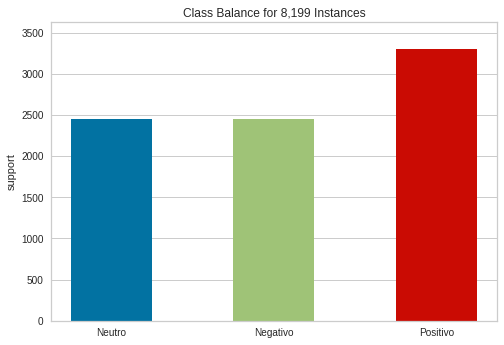

In [ ]:
# Yellowbrick 
# Balanço 
from yellowbrick import ClassBalance

# Instanciar 
Grafico_Balanco = ClassBalance( labels=['Neutro', 'Negativo', 'Positivo'] )
Grafico_Balanco.fit( Base_Dados['Classificacao'] )
Grafico_Balanco.show()

In [ ]:
# Plot - Avaliar 
Anl_Valores = Base_Dados['Classificacao'].value_counts()

# Plotly
Grafico_Balanco_02 = go.Figure(
    go.Funnelarea(
        text=Anl_Valores.index,
        values=Anl_Valores.values,
        title={'text':'Distribuição dos Sentimentos', 'position':'top center'}
    )
)

Grafico_Balanco_02.show()

## **Quantidade de Palavras** 

In [ ]:
# Função para calcular o tamanho das palavras 

def Quantidade_Palavras ( Texto ):
  Quebrar = Texto.split()
  Quantidade = len( Quebrar )
  return Quantidade 

Base_Dados['Quantidade_Palavras'] = Base_Dados['Text'].apply( Quantidade_Palavras )

# Verificando
Base_Dados.head()

,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Data_Formatada,Ano,Mes,Dia,Quantidade_Palavras
0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,2017-01-08,2017,1,8,10
1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8,7
2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8,7
3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,2017-01-04,2017,1,4,2
4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,2017-01-09,2017,1,9,20


In [ ]:
# Analise 
Base_Dados['Quantidade_Palavras'].describe()

count    8199.000000
mean       16.141115
std         4.280192
min         1.000000
25%        13.000000
50%        15.000000
75%        19.000000
max        32.000000
Name: Quantidade_Palavras, dtype: float64

In [ ]:
# Plot 
px.box(Base_Dados, x='Classificacao', y='Quantidade_Palavras', color='Classificacao', title='Quantidade de palavras por sentimento')

## **Nuvem de Palavras**

In [ ]:
!pip install wordcloud

# Função para nuvem de palavras 
from wordcloud import WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Criando uma WordCloud**

In [ ]:
# 1ª etapa - Concatenando o texto em uma única String 

# Criar uma variável 
Concatenar = ''

# Loop no texto 
for Loop in Base_Dados['Text']:

  # Depois que eu acessar registro por registro, faremos um loop para concatenar tudo
  for Palavra in Loop.split():

    #Juntando as palavras 
    Concatenar = Concatenar + ' ' + Palavra 

print(f'Quantidade de palavras agrupadas { len(Concatenar) }')

Quantidade de palavras agrupadas 961415


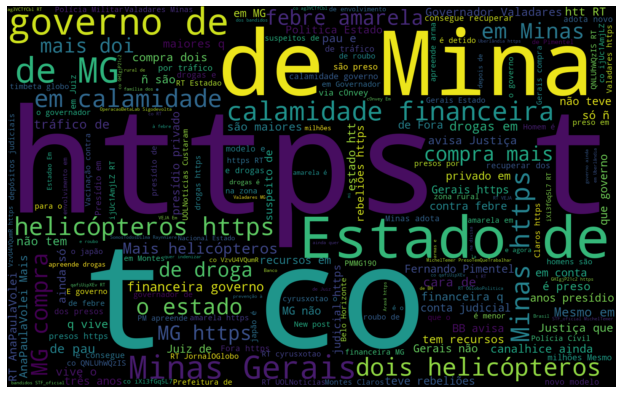

In [ ]:
# 2ª etapa - Fazer o plot 

# Instanciando a nuvem de palavras 
Nuvem_Palavras = WordCloud( width=1600, height=1000).generate(Concatenar)

# Tamanho 
Figura, Eixo = plt.subplots( figsize=(15,7))
# Plot 
Eixo.imshow( Nuvem_Palavras, interpolation='bilinear' )
# Desativa os grids 
Eixo.set_axis_off()

In [ ]:
Base_Dados['Classificacao'].unique()

array(['Neutro', 'Negativo', 'Positivo'], dtype=object)

In [ ]:
# Ajuste dos textos 

Palavras_Positivas = ''
Palavras_Negativas = ''
Palavras_Neutras = ''

# Loop 
for Sentimento in Base_Dados['Classificacao'].unique():

  # Análise sentimento positivo
  if Sentimento == 'Positivo':
    Filtro = Base_Dados.loc[Base_Dados['Classificacao']==Sentimento]

    # Loop para concatenar
    for Palavra in Filtro['Text']:
      for Quebra in Palavra.split():
        Palavras_Positivas = Palavras_Positivas + ' ' + Quebra 

  # Análise sentimento negativo 
  elif Sentimento == 'Negativo':
    Filtro = Base_Dados.loc[Base_Dados['Classificacao']==Sentimento]

    # Loop para concatenar
    for Palavra in Filtro['Text']:
      for Quebra in Palavra.split():
        Palavras_Negativas = Palavras_Negativas + ' ' + Quebra

  # Análise sentimento neutro 
  else:
    Filtro = Base_Dados.loc[Base_Dados['Classificacao']==Sentimento]

    # Loop para concatenar
    for Palavra in Filtro['Text']:
      for Quebra in Palavra.split():
        Palavras_Neutras = Palavras_Neutras + ' ' + Quebra


print(
    'Quantidade de Palavras: \n',
    f'Positivo: {len(Palavras_Positivas)}',
    f'Negativo: {len(Palavras_Negativas)}',
    f'Neutro: {len(Palavras_Neutras)}',
)


Quantidade de Palavras: 
 Positivo: 374456 Negativo: 307576 Neutro: 279383


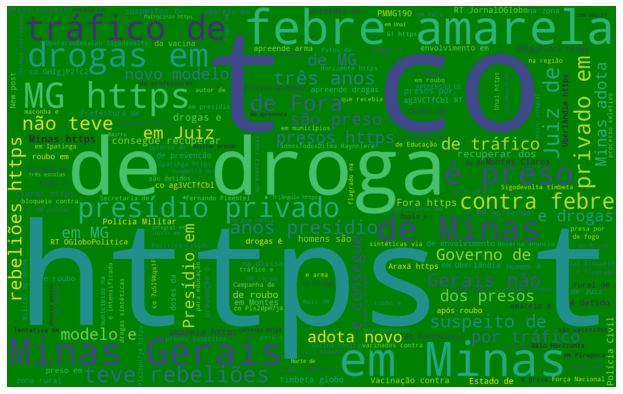

In [ ]:
# Análise de sentimentos - wordcloud Positivas 

# Instanciando a nuvem de palavras 
Nuvem_Palavras = WordCloud( width=1600, height=1000, background_color='green').generate(Palavras_Positivas)

# Tamanho 
Figura, Eixo = plt.subplots( figsize=(15,7))
# Plot 
Eixo.imshow( Nuvem_Palavras, interpolation='bilinear' )
# Desativa os grids 
Eixo.set_axis_off()

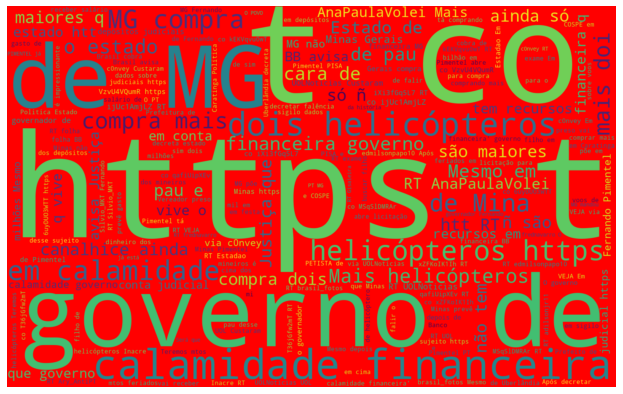

In [ ]:
# Análise de sentimentos - wordcloud Negativas 

# Instanciando a nuvem de palavras 
Nuvem_Palavras = WordCloud( width=1600, height=1000, background_color='red').generate(Palavras_Negativas)

# Tamanho 
Figura, Eixo = plt.subplots( figsize=(15,7))
# Plot 
Eixo.imshow( Nuvem_Palavras, interpolation='bilinear' )
# Desativa os grids 
Eixo.set_axis_off()

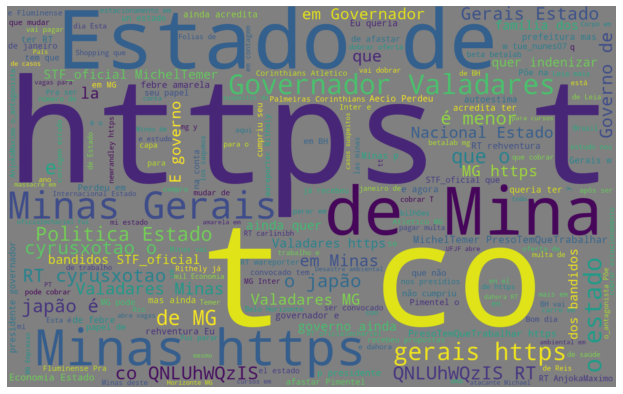

In [ ]:
# Análise de sentimentos - wordcloud Neutras 

# Instanciando a nuvem de palavras 
Nuvem_Palavras = WordCloud( width=1600, height=1000, background_color='gray').generate(Palavras_Neutras)

# Tamanho 
Figura, Eixo = plt.subplots( figsize=(15,7))
# Plot 
Eixo.imshow( Nuvem_Palavras, interpolation='bilinear' )
# Desativa os grids 
Eixo.set_axis_off()

## **Rank das Palavras mais usadas**

In [ ]:
# Importação de função
from collections import Counter

In [ ]:
# Quebrar as frases 
Quebra_Frases = Base_Dados['Text'].apply( lambda Texto : str(Texto).split() )

# Rank das palavras 
Dados_Rank = Counter( [ item for sublist in Quebra_Frases for item in sublist ] )

# Tabela 
Tab_Quantidade = pd.DataFrame( Dados_Rank.most_common(20) )

# Ajustar as colunas 
Tab_Quantidade.columns = ['Palavra', 'Qtd']

# Verificar 
Tab_Quantidade

,Palavra,Qtd
0,de,8352
1,em,4003
2,RT,3080
3,Minas,2626
4,e,2079
5,-,1937
6,MG,1849
7,a,1707
8,o,1419
9,do,1415


In [ ]:
# Plot das Quantidades 
Figura = px.bar(
    Tab_Quantidade,
    x='Qtd',
    y='Palavra',
    color='Palavra',
    orientation='h', #Horizontal
    width=700,
    height=700
)

Figura.show()

# **Mineração de Textos**

## **Remoção de duplicados**

In [ ]:
# Copia
Copia_Base = Base_Dados.copy() 

# Antes
print(Base_Dados.shape)

# Duplicados 
Base_Dados.drop_duplicates(['Text'], inplace=True)

# Depois 
print(Base_Dados.shape)

(8199, 14)
(5765, 14)


## **Stop Words**

In [ ]:
# Download 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Verificação de conteúdo 
nltk.corpus.stopwords.words('portuguese')[0:20]

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele']

In [ ]:
# Tamanho 
len(nltk.corpus.stopwords.words('portuguese'))

207

## **Radical (stemming)**

In [ ]:
# Download 
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [ ]:
# Função para extração do Radical (RSLPStemmer)
Radical = nltk.stem.RSLPStemmer()

# Lista de palavras 
Palavras = ['Gostei', 'Gostam', 'Gostarão', 'Gostamos', 'Gostaram']
# Todas as palavras possuem um mesmo 'sentido raiz', o que possibilita retirar o radical e manter apenas a raiz que dá sentido as palavras

for Loop in Palavras:
  print (Loop,' - ', Radical.stem(Loop))

Gostei  -  gost
Gostam  -  gost
Gostarão  -  gost
Gostamos  -  gost
Gostaram  -  gost


## **Expressões regulares - REGEX**

In [ ]:
#  Frase de exemplo
Frase_Exemplo = 'Acessei o site do google https://www.google.com.br e achei simples!'

In [ ]:
# Localizar na frase 
re.findall('www', Frase_Exemplo)

['www']

In [ ]:
# Localizar letras 
re.findall('[a-c]', Frase_Exemplo)

['c', 'c', 'b', 'a', 'c']

In [ ]:
# Localizar sequência 
re.findall('goo...', Frase_Exemplo)

['google', 'google']

In [ ]:
# Substituir valores/textos 
re.sub('site', '__SITE__;D ', Frase_Exemplo)

'Acessei o __SITE__;D  do google https://www.google.com.br e achei simples!'

## **Frequência de Palavras - NLTK**

In [ ]:
# Exemplo 
Frase = 'Hoje o dia está bonito, inclusive hoje estou assistindo um treinamento de ciência de dados.'

In [ ]:
# Aplicação com NLTK
Frequencia = nltk.FreqDist(Frase.split())

# Visualizo 
Frequencia.most_common()

[('de', 2),
 ('Hoje', 1),
 ('o', 1),
 ('dia', 1),
 ('está', 1),
 ('bonito,', 1),
 ('inclusive', 1),
 ('hoje', 1),
 ('estou', 1),
 ('assistindo', 1),
 ('um', 1),
 ('treinamento', 1),
 ('ciência', 1),
 ('dados.', 1)]

# **Construção do Modelo**

In [ ]:
# Separar Dados 
Dados_Modelo = Base_Dados[['Text', 'Classificacao']]

Dados_Modelo.shape

(5765, 2)

## **Limpeza dos dados**

In [ ]:
# Limpeza 
Exemplo = Base_Dados['Text'][0]

print (Exemplo)

���⛪ @ Catedral de Santo Antônio - Governador Valadares/MG https://t.co/JSbKamIqUJ


In [ ]:
# Trabalhar com camadas para facilitar alterações futuras 

def Limpeza_Dados( Texto ):

 
    #Função para limpar os dados 
  

  # Camada 1 - Retirar os links 
  Camada_01 = re.sub( 'https:\S+', '', Texto)

  # Camada 2 - Converter para minúsculos
  Camada_02 = Camada_01.lower()

  # Camada 3 - Retirar caracteres especiais 
  Camada_03 =  re.sub('["("")"?@|$|.|!,:%;"]', '', Camada_02)

  # Camada 4 - Retirar emojis
  Retirar_Emojis = re.compile(
    "["
        u"\U0001F600-\U0001F64F"  # Emojis
        u"\U0001F300-\U0001F5FF"  # Simbolos
        u"\U0001F680-\U0001F6FF" 
        u"\U0001F1E0-\U0001F1FF"  
        u"\U0001F1F2-\U0001F1F4"  
        u"\U0001F1E6-\U0001F1FF" 
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
    "]+", flags=re.UNICODE
    )

  Camada_04 = Retirar_Emojis.sub( '', Camada_03 )

  # Camada 5 - Retirar Hashtags
  Camada_05 = re.sub('#\S+', '', Camada_04)

  # Camada 6 - Retirar valores numéricos
  Camada_06 = re.sub('[0-9]', '', Camada_05)

  return Camada_06

In [ ]:
# Aplicando a função
Dados_Modelo['Text'] = Dados_Modelo['Text'].apply( Limpeza_Dados )

Dados_Modelo.head()

,Text,Classificacao
0,catedral santo antônio - governador valadar...,Neutro
1,governador valadares minas gerais,Neutro
2,governador valadares minas gerais,Neutro
3,,Neutro
4,psol vai questionar aumento vereadores prefe...,Negativo


## **Análise de StopWords**

In [ ]:
# Pool de Palavras 
Grupo_Palavras = nltk.corpus.stopwords.words('portuguese')

len(Grupo_Palavras)

207

In [ ]:
def Remover_StopWords ( Texto ):

  # Remover as palavras 'vazias'

  # 1 - Quebrar as frases
  Lista_Palavras = Texto.split()

  # 2 - Nova frase 
  Frase_Ajustada = ''

  # 3 - Loop
  for Loop in Lista_Palavras:

    # 3.1 - Validar se é uma StopWord
    if Loop not in Grupo_Palavras:
      Frase_Ajustada = Frase_Ajustada + ' ' + Loop 
  
  return Frase_Ajustada 

In [ ]:
# Aplicando a função
Dados_Modelo['Text'] = Dados_Modelo['Text'].apply( Remover_StopWords )

Dados_Modelo.head()

,Text,Classificacao
0,catedral santo antônio - governador valadares/mg,Neutro
1,governador valadares minas gerais,Neutro
2,governador valadares minas gerais,Neutro
3,,Neutro
4,psol vai questionar aumento vereadores prefei...,Negativo


## **Extração do Radical**

In [ ]:
# Definir a função do Radical
Radical = nltk.stem.RSLPStemmer()

In [ ]:
def Extrair_Radical (Texto):

  # Extrair o radical da palavra
  
  # 1 - Quebrar a frase 
  Lista_Palavras = Texto.split()

  # 2 - Nova Frase 
  Frase_Ajustada = ''

  # 3 - Loop
  for Loop in Lista_Palavras:

    # Aplicar o radical 
    Extracao = Radical.stem(Loop)
    Frase_Ajustada = Frase_Ajustada + ' ' + Extracao

  return Frase_Ajustada

In [ ]:
# Aplicando a função
Dados_Modelo['Text'] = Dados_Modelo['Text'].apply( Extrair_Radical )

Dados_Modelo.head()

,Text,Classificacao
0,catedr sant antôni - govern valadares/mg,Neutro
1,govern valad min geral,Neutro
2,govern valad min geral,Neutro
3,,Neutro
4,psol vai quest aument vere prefeit bh justiç ...,Negativo


## **Tokenização - Transformando os dados em uma matriz**

In [ ]:
# Download da função necessária
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize

## **Modelo**

In [ ]:
# importando funções necessárias 

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import TweetTokenizer

In [ ]:
# Separar os dados 
Frases = Dados_Modelo['Text']
Classes = Dados_Modelo['Classificacao']

# Dividindo os dados 
from sklearn.model_selection import train_test_split

# Organização da estrutura
x_treino, x_teste, y_treino, y_teste = train_test_split(
    Frases, Classes, test_size=0.2, random_state=10
)

print(f'Quantidade de dados de treino: {x_treino.shape[0]}')
print(f'Quantidade de dados de teste: {x_teste.shape[0]}')

Quantidade de dados de treino: 4612
Quantidade de dados de teste: 1153


In [ ]:
# Divisão das Tabelas (Matrizes)

# 1 - Instanciar o método 
Token = TweetTokenizer()
Vetorizacao = CountVectorizer (analyzer = 'word', tokenizer=Token.tokenize)

In [ ]:
# 2 - Aplicando Transformação
Frequencia_Palavras = Vetorizacao.fit_transform( x_treino )

type(Frequencia_Palavras)

scipy.sparse.csr.csr_matrix

In [ ]:
# Fitar o modelo
from sklearn.naive_bayes import MultinomialNB

# Instanciando o modelo
Modelo_NB = MultinomialNB()

# Treinamento 
Modelo_NB.fit(Frequencia_Palavras, y_treino)

MultinomialNB()

## **Avaliação do Modelo**

In [ ]:
# Transformação do x_teste 
Vetor_x_teste = Vetorizacao.transform(x_teste)

# Fazendo as previsões
Previsoes = Modelo_NB.predict(Vetor_x_teste)

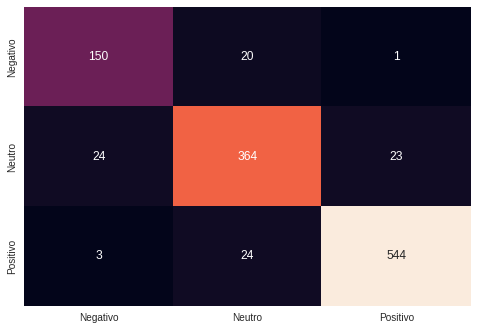

In [ ]:
# Matriz de confusão 
from sklearn.metrics import confusion_matrix

# Definindo as classes 
Classes = ['Negativo', 'Neutro', 'Positivo']

# Plot 
Matriz_Confusao = confusion_matrix(y_teste, Previsoes)

sns.heatmap( Matriz_Confusao, annot=True, cbar=False, fmt='d', yticklabels=Classes, xticklabels=Classes )

In [ ]:
 # Relatório de Classificação 
 from sklearn.metrics import classification_report

 # Avaliação
 Avaliacao = classification_report(y_teste, Previsoes)

 print (Avaliacao)

              precision    recall  f1-score   support

    Negativo       0.85      0.88      0.86       171
      Neutro       0.89      0.89      0.89       411
    Positivo       0.96      0.95      0.96       571

    accuracy                           0.92      1153
   macro avg       0.90      0.91      0.90      1153
weighted avg       0.92      0.92      0.92      1153



## **Teste Modelo**

In [99]:
def Consolidar_Funcoes( Texto ):
  # 1ª Etapa 
  Limpeza = Limpeza_Dados( Texto )

  # 2ª Etapa
  Stop = Remover_StopWords ( Limpeza )

  # 3ª Etapa  
  Rad = Extrair_Radical ( Stop )

  # 4ª Etapa 
  Vet = Vetorizacao.transform( [Rad] )

  # 5ª Etapa
  Previsao = Modelo_NB.predict( Vet )

  return ( Previsao ) 

In [104]:
Escrevendo_Tweeter = input('O que está pensando?: ')

print(f'O sentimento da frase é o seguinte:{Consolidar_Funcoes(Escrevendo_Tweeter)[0]}')

O que está pensando?: Adoro corações
O sentimento da frase é o seguinte:Positivo


## **Upgrade no Modelo**

In [106]:
# Outros Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Algoritmos
Algoritmos = [
    LogisticRegression(),
    RandomForestClassifier(n_estimators=300, max_depth=12),
    MultinomialNB(),
    SVC()
]

# Nomes 
Lista_Nome = ['Regressão Logística', 'Floresta Aleatória', 'Naive Bayes', 'Vetor de Maquinas']

In [108]:
# Lista das acurácias 

Resultado_Acuracia = []

# Loop
for Nome, Modelo in zip(Lista_Nome, Algoritmos):

  # Atribuir o algoritmo 
  Alg = Modelo

  # Treinamento 
  Alg.fit( Frequencia_Palavras, y_treino )

  # Transformar os dados de Teste 
  Vetor_Teste = Vetorizacao.transform( x_teste )

  # Previsão
  Previsoes_Teste = Alg.predict (Vetor_Teste)

  # Resultado final
  Resultado = accuracy_score(y_teste, Previsoes_Teste)

  # Salvar
  Resultado_Acuracia.append( Resultado )

In [109]:
# Organizar dentro de um dicionário 
Dicionario = {
    'Nome': Lista_Nome,
    'Resultado': Resultado_Acuracia
}

pd.DataFrame( Dicionario ).sort_values('Resultado', ascending=False)

,Nome,Resultado
3,Vetor de Maquinas,0.947962
0,Regressão Logística,0.942758
2,Naive Bayes,0.917606
1,Floresta Aleatória,0.888118
